In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from ChromUtils.IMLib import discretize_make_sets as IM_dms
from ChromUtils.IMLib import create_plots as IM_cp

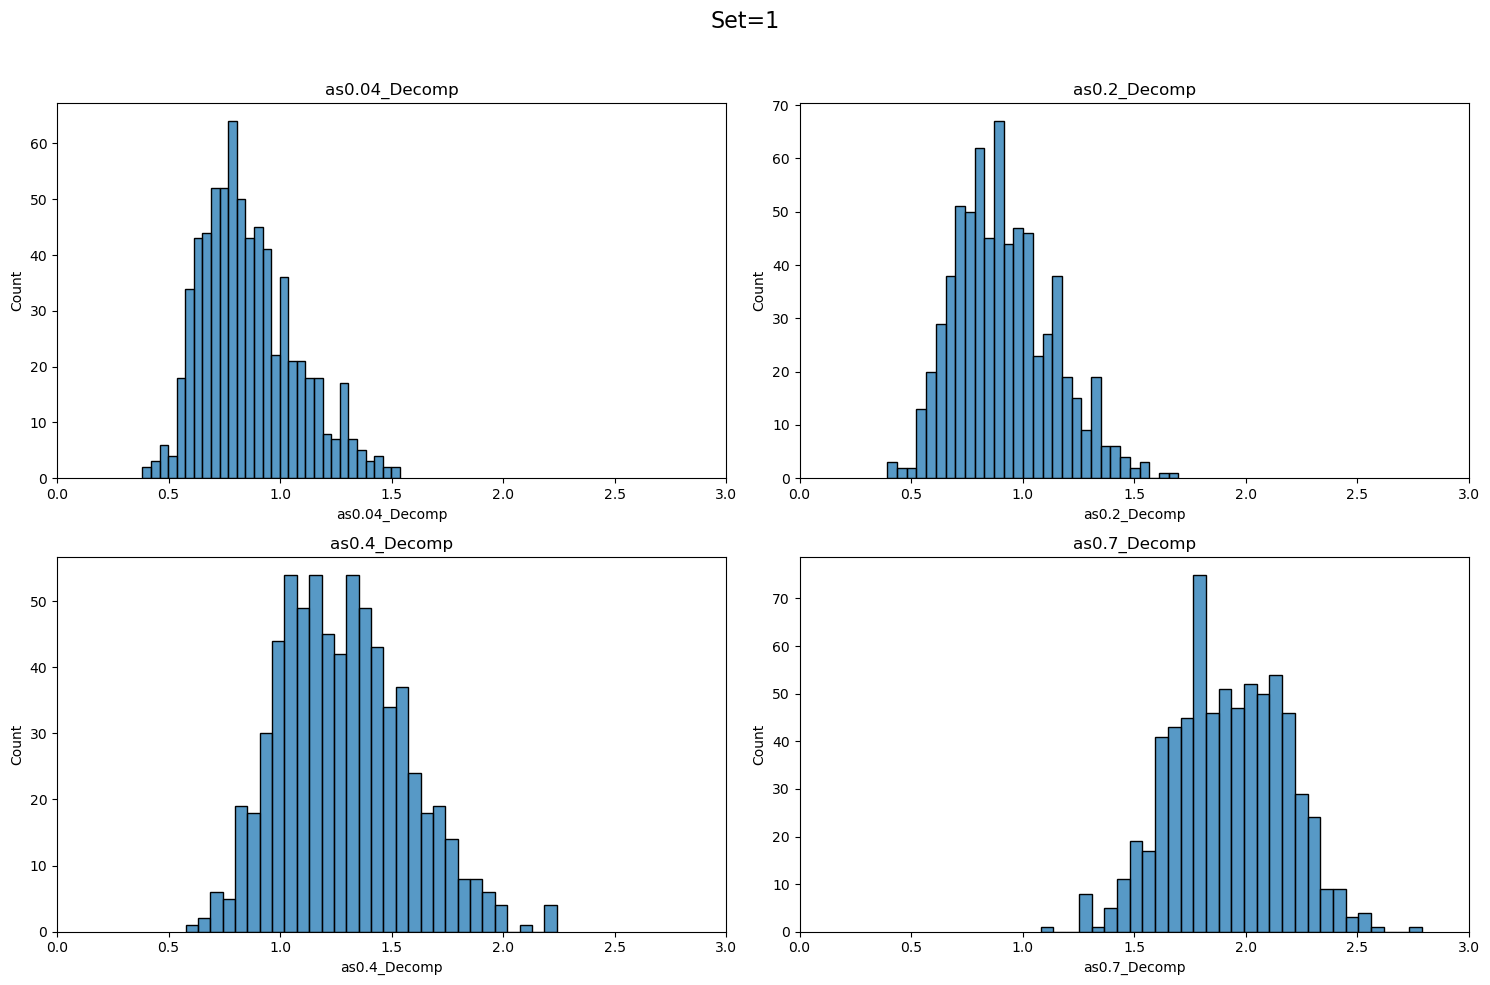

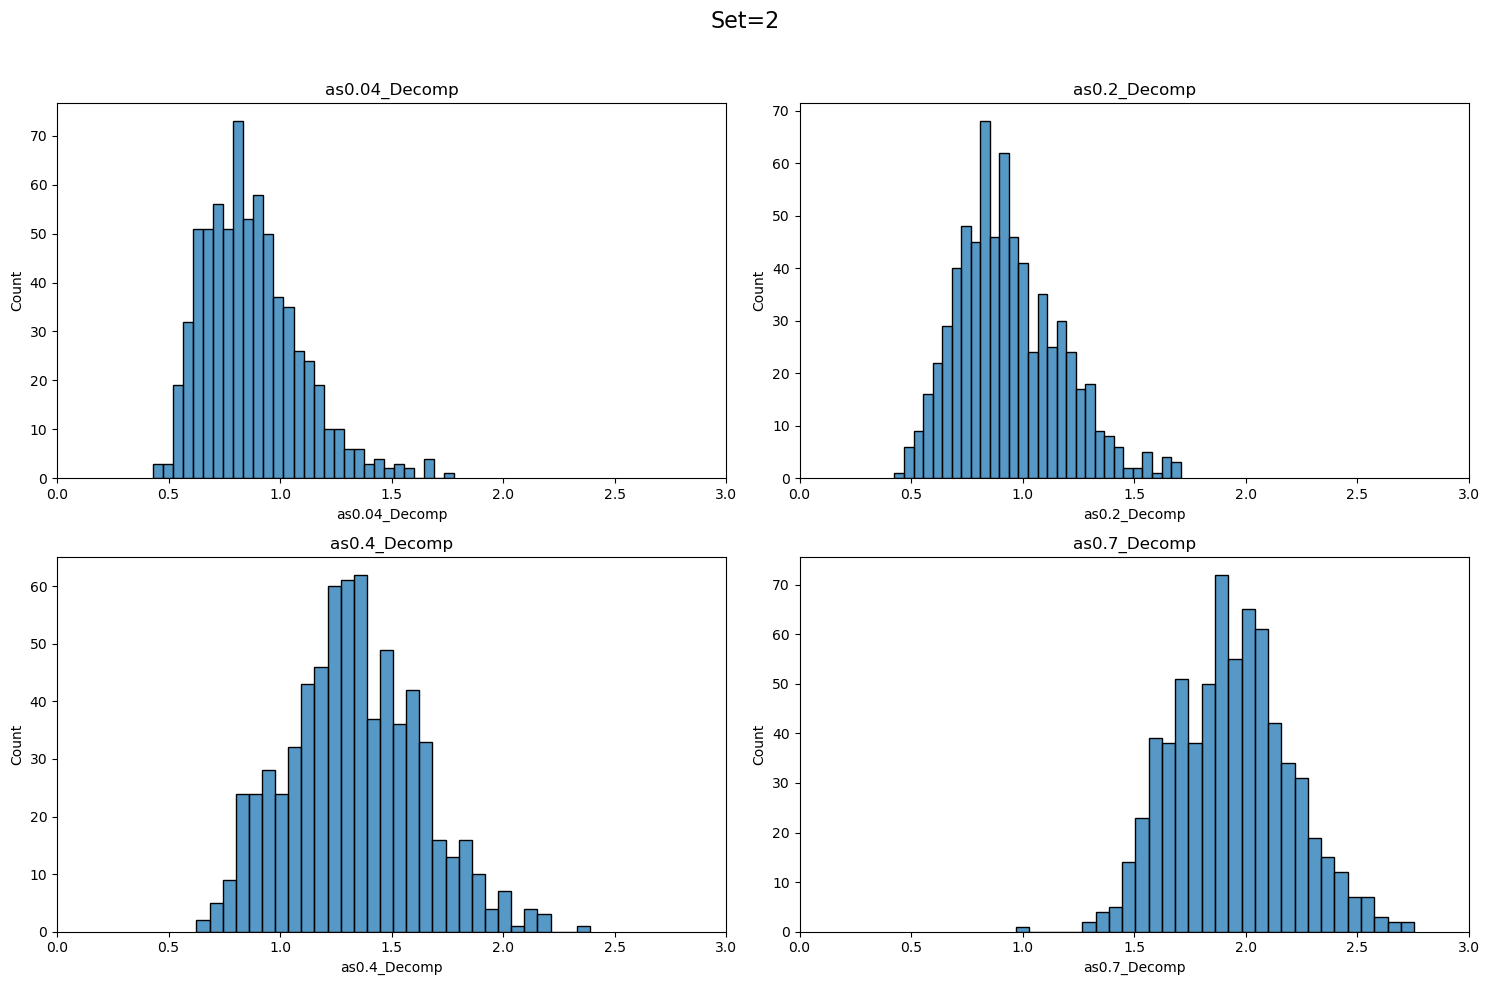

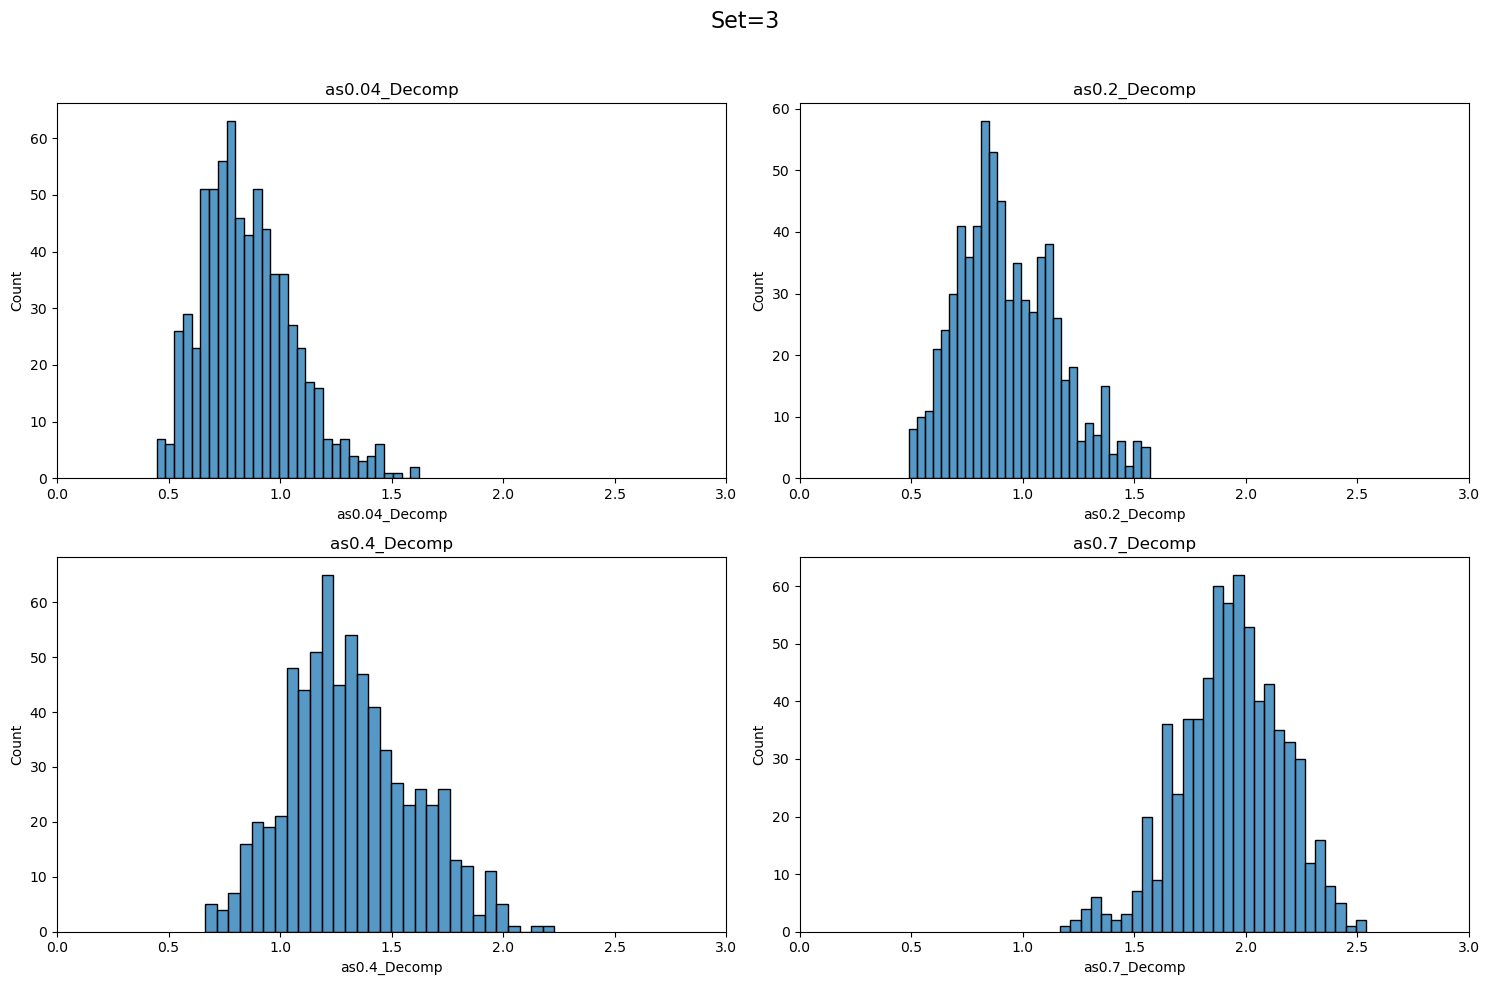

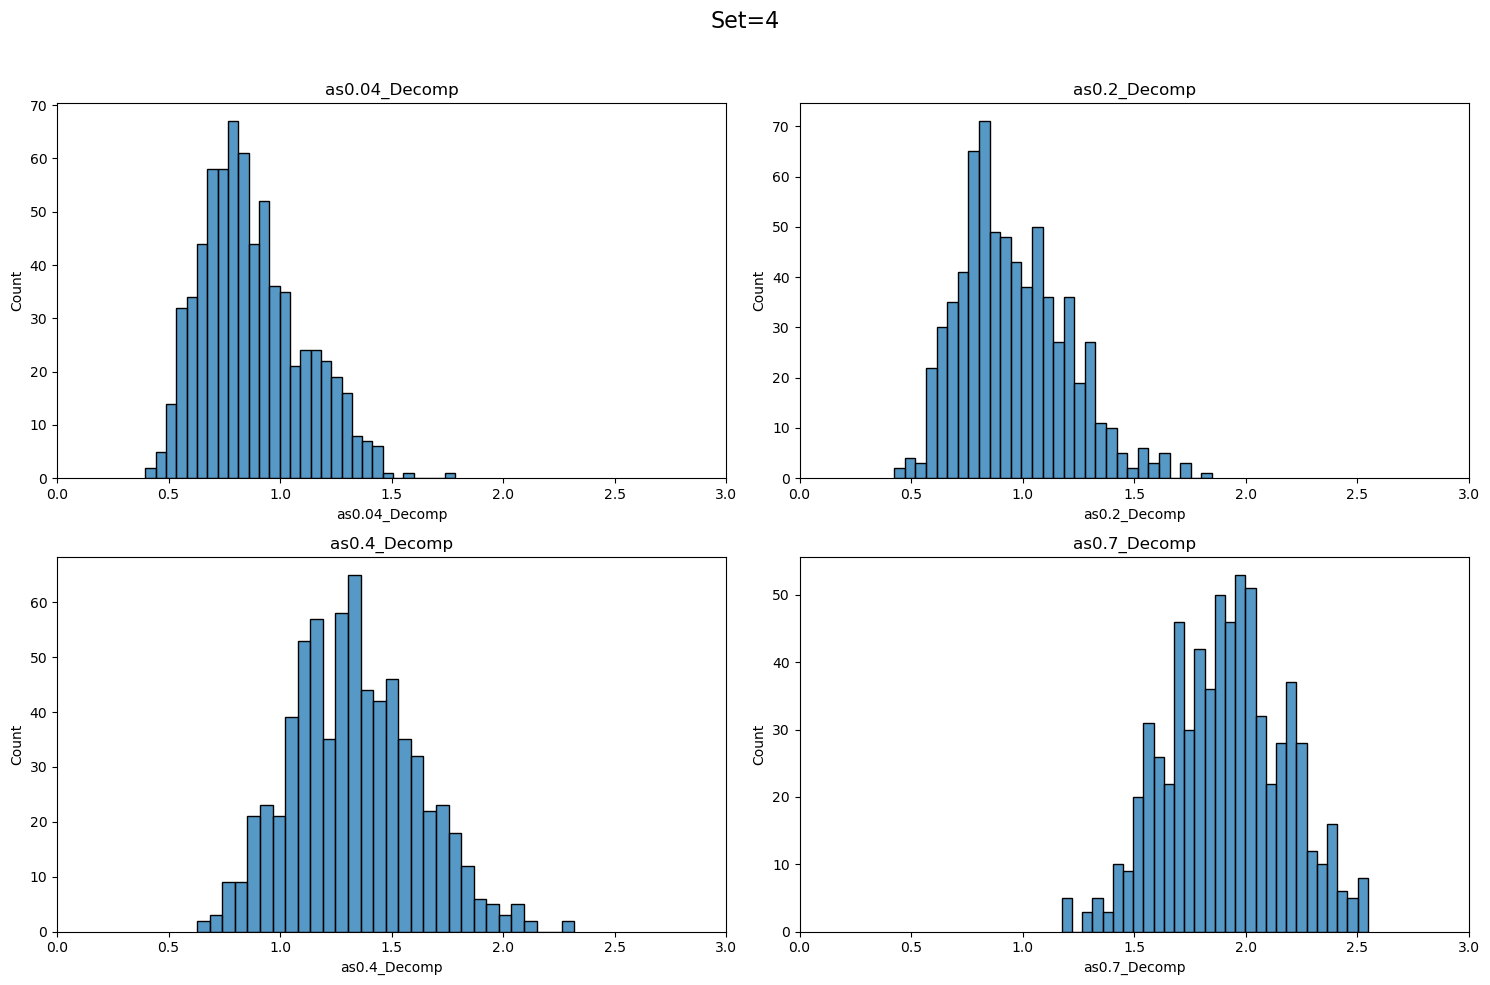

In [2]:
setlist = [1,2,3,4]
avg_decomp_df = pd.DataFrame()
for set in setlist:
    df = pd.read_csv('dediff_decomp_data_sga0.001_epa4.0_sgat2_set'+str(set)+'.csv')
    
    decomp_columns = [col for col in df.columns if 'Decomp' in col]
    n = int(len(decomp_columns) / 2)
    m = 2
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15, 5*n))
    fig.suptitle("Set=" + str(set), fontsize=16)
    
    for i, col in enumerate(decomp_columns):
        ax = axes[i // m, i % m]
        sns.histplot(df[col], bins=30, ax=ax)
        ax.set_title(col)
        ax.set_xlim(0,3)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    if avg_decomp_df.empty:
        avg_decomp_df = df.copy()
        avg_decomp_df[decomp_columns] = 0

    avg_decomp_df[decomp_columns] += df[decomp_columns]

avg_decomp_df[decomp_columns] /= len(setlist)


In [3]:
print(avg_decomp_df)

     Chrom1-id  Domain1  Domain1-points-to  Specific  as0.04_Decomp  \
0            0        1                  2         1       0.785343   
1            0        2                  3         1       0.713716   
2            0        3                  4         1       0.885584   
3            0        4                  5         1       0.635570   
4            0        5                  6         1       0.731219   
..         ...      ...                ...       ...            ...   
687         22       20               1107         1       0.795191   
688         22       21               1107         0       0.840666   
689         22       21               1107         1       0.840666   
690         22       22               1107         0       0.745558   
691         22       22               1107         1       0.745558   

     as0.2_Decomp  as0.4_Decomp  as0.7_Decomp  
0        0.980365      1.081915      1.881256  
1        0.807688      1.216300      1.710617  
2  

In [4]:
disc_decomp_df = IM_dms.discretize_columns(avg_decomp_df, 'Decomp', 4)
print(disc_decomp_df)
print(disc_decomp_df['as0.7_Decomp_discretized'].value_counts())


['as0.04_Decomp', 'as0.2_Decomp', 'as0.4_Decomp', 'as0.7_Decomp']
     Chrom1-id  Domain1  Domain1-points-to  Specific  as0.04_Decomp  \
0            0        1                  2         1       0.785343   
1            0        2                  3         1       0.713716   
2            0        3                  4         1       0.885584   
3            0        4                  5         1       0.635570   
4            0        5                  6         1       0.731219   
..         ...      ...                ...       ...            ...   
687         22       20               1107         1       0.795191   
688         22       21               1107         0       0.840666   
689         22       21               1107         1       0.840666   
690         22       22               1107         0       0.745558   
691         22       22               1107         1       0.745558   

     as0.2_Decomp  as0.4_Decomp  as0.7_Decomp  as0.04_Decomp_discretized  \
0    

In [5]:
# df_set = IM_dms.create_single_set_info(disc_decomp_df, 'Decomp', 3)
cva = 'Decomp_discretized'
columns_to_extract = ["Chrom1-id", "Domain1","Domain1-points-to",
                      "Specific"] + [col for col in disc_decomp_df.columns if cva in col]

# print(df.columns)
print("cols extract",columns_to_extract)
new_df = disc_decomp_df[columns_to_extract]
print(new_df.columns)



cols extract ['Chrom1-id', 'Domain1', 'Domain1-points-to', 'Specific', 'as0.04_Decomp_discretized', 'as0.2_Decomp_discretized', 'as0.4_Decomp_discretized', 'as0.7_Decomp_discretized']
Index(['Chrom1-id', 'Domain1', 'Domain1-points-to', 'Specific',
       'as0.04_Decomp_discretized', 'as0.2_Decomp_discretized',
       'as0.4_Decomp_discretized', 'as0.7_Decomp_discretized'],
      dtype='object')


In [6]:
import itertools
import plotly.express as px
import plotly.graph_objects as go


def create_single_set_info(inp_df, col,nbins=4):
    df = inp_df.copy()
    if nbins == 4:
        string_scale = ["1-low", "2-medium", "3-high"]
    if nbins == 6:
        string_scale = ["1-very-low","2-low","3-medium","4-high","5-very-high"]
    if nbins != 4 and nbins != 6:
        print("bad nbins value")
        return None
    str_snip = col.split('_')[1] #.split('_')[0]
    possible_sets = [str_snip + "-" + string_scale[i] for i in range(nbins-1)]
    print(possible_sets)
    
    sets_list = [str_snip+ "-" + string_scale[df[col].values[i]] for i in range(len(df[col].values))]
    print(sets_list)
    df['sis_'+col] = pd.Categorical(np.array(sets_list), categories=possible_sets, ordered=True)
    # df = df.sort_values('sis_'+col)
    df = df.sort_values(col)
    df.reset_index(drop=True, inplace=True)
    
    return df, possible_sets



In [7]:
vastr = [col for col in disc_decomp_df.columns if 'Decomp_discretized' in col]
print(vastr)
for cva in vastr:
    print(cva)
    # new_sets_df = IM_dms.create_single_set_info(disc_decomp_df, cva, 4)
    new_sets_df, _ = create_single_set_info(disc_decomp_df, cva, 4)

# print(possible_sets)

['as0.04_Decomp_discretized', 'as0.2_Decomp_discretized', 'as0.4_Decomp_discretized', 'as0.7_Decomp_discretized']
as0.04_Decomp_discretized
['Decomp-1-low', 'Decomp-2-medium', 'Decomp-3-high']
['Decomp-1-low', 'Decomp-1-low', 'Decomp-2-medium', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-2-medium', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-2-medium', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-2-medium', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-low', 'Decomp-1-

In [8]:
print(new_sets_df.columns)
print(new_sets_df)

Index(['Chrom1-id', 'Domain1', 'Domain1-points-to', 'Specific',
       'as0.04_Decomp', 'as0.2_Decomp', 'as0.4_Decomp', 'as0.7_Decomp',
       'as0.04_Decomp_discretized', 'as0.2_Decomp_discretized',
       'as0.4_Decomp_discretized', 'as0.7_Decomp_discretized',
       'sis_as0.7_Decomp_discretized'],
      dtype='object')
     Chrom1-id  Domain1  Domain1-points-to  Specific  as0.04_Decomp  \
0            0       14                 15         1       0.707275   
1            0       22               1107         0       0.663120   
2            0       22               1107         1       0.663120   
3           21       20                 20         1       1.063706   
4           21       21                 21         1       1.362170   
..         ...      ...                ...       ...            ...   
687         18        4               1107         0       1.129322   
688         18        4               1107         1       1.129322   
689          8        8             

In [15]:
def create_sankey_diagram_ordered(df, vastr, possible_sets, column_prefix_dict,nbins=3):
    labellist = [f"{va}_{ps}" for va in vastr for ps in possible_sets]
    print(labellist)
    print(len(labellist), len(vastr))
    column_prefix = list(column_prefix_dict.keys())[0]
    colorlist = px.colors.qualitative.Plotly[:len(possible_sets)] * len(vastr)
    pairs = list(itertools.chain(
        *[itertools.product(range(i * len(possible_sets), (i + 1) * len(possible_sets)),
                            range((i + 1) * len(possible_sets), (i + 2) * len(possible_sets)))
          for i in range(len(vastr) - 1)]
    ))


    source = [pairs[i][0] for i in range(len(pairs))]
    target = [pairs[i][1] for i in range(len(pairs))]
    
    print("source",source)

    print("target",target)

    # print(df.columns)
    print([col for col in df.columns if column_prefix in col])
    print([np.unique(df[col].values) for col in df.columns if column_prefix in col])
    sizes = []
    possible_vals = np.arange(0, len(possible_sets))
    for va1, va2 in zip(vastr[:-1], vastr[1:]):
        for i, ps1 in enumerate(possible_vals):
            for j, ps2 in enumerate(possible_vals):

                # print(ps1,ps2,f'{va1}_{column_prefix}',f'{va2}_{column_prefix}')
                # print((df[f'{column_prefix}_{va1}'] == ps1).sum())
                # print((df[f'{column_prefix}_{va2}'] == ps2).sum())
                
                size = ((df[f'{va1}_{column_prefix}'] == ps1) & (df[f'{va2}_{column_prefix}'] == ps2)).sum()
                if size > 0:

                    sizes.append(size)
                else:
                    sizes.append(1)
    print(sizes)
    print(len(sizes))

    ch_sizes = []
    for va in vastr:
        for ps in possible_vals:
            # print(va,f'{column_prefix}_{va}',ps,(df[f'{column_prefix}_{va}'] == ps).sum())
            ch_sizes.append((df[f'{va}_{column_prefix}'] == ps).sum())

    # ch_sizes = list([((df[f'{column_prefix}_{va}'] == ps).sum() for ps in possible_sets for va in vastr )])


    print(ch_sizes)
    posxlist = np.repeat(np.linspace(0.001, 0.999, len(vastr)), len(possible_sets))
    chunk_size = len(possible_sets)
    posylist = []
    shift = 0.0
    for i in range(len(vastr)):
        chunk = ch_sizes[i * chunk_size:(i + 1) * chunk_size]
        total_size = sum(chunk)
        print("va", vastr[i], chunk, total_size)

        # Ensure the order is low, medium, high
        sorted_chunk = sorted(chunk)
        
        # Calculate the cumulative sum of the normalized sizes
        cumulative_sum = np.cumsum([(1 / (nbins + 1)) * (1 - size / total_size) for size in sorted_chunk])
        
        # posylist.extend(cumulative_sum)
        posylist.extend([0.25-shift,0.5-shift,0.75-shift])
        shift +=0.2

    print("posxlist", posxlist)
    print("posylist", posylist)

    # Rescale sizes to fit within the figure dimensions
    max_size = max(sizes)
    rescaled_sizes = [size / max_size * 100 for size in sizes]

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=[""] * len(labellist),  # Empty labels
            color=colorlist,
            x=posxlist,
            y=posylist
        ),
        link=dict(
            source=source,
            target=target,
            value=rescaled_sizes
        ),
        arrangement='snap'
    )])

    # Add va values at the bottom of each set
    for i, va in enumerate(vastr):
        fig.add_annotation(
            x=posxlist[i * len(possible_sets) + len(possible_sets) // 2],
            y=-0.2,  # Position below the plot
            text=f"v<sub>a</sub>={va[2:]}",
            showarrow=False,
            font=dict(size=20)
        )

    # Set xlim and ylim
    fig.update_xaxes(range=[0, 1], showticklabels=False)
    fig.update_yaxes(range=[-0.11, 1], showticklabels=False)
    
    # Remove xlabels, ylabels, xticks, and yticks
    fig.update_layout(
        xaxis=dict(showticklabels=False,showgrid=False),
        yaxis=dict(showticklabels=False,showgrid=False),
    )

    # Add a global color legend for low, medium, and high
    legend_labels = ["Low", "Medium", "High"]
    for i, label in enumerate(legend_labels):
        fig.add_trace(go.Scatter(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=12, color=colorlist[i]),
            legendgroup=label,
            showlegend=True,
            name=label,
            textfont=dict(size=20)  # Increase the font size to 20
        ))

    fig.update_layout(
        title_text="", #"Sankey Diagram of " + column_prefix_dict[column_prefix],
        font_size=18,
        width=800,
        height=600,
        showlegend=True,
        margin=dict(l=50, r=50, t=50, b=150)  # Adjust margins to prevent overflow
    )
    fig.show()

In [16]:
possible_sets = IM_dms.create_possible_sets_single_col("Decomp")
print(possible_sets)
vastr = [col.split("_")[0] for col in disc_decomp_df.columns if 'Decomp_discretized' in col]
print("vastr",vastr)
create_sankey_diagram_ordered(new_sets_df,vastr,possible_sets,
                                    {'Decomp_discretized': 'Decompaction'})

Decomp ['Decomp']
['Decomp-1-low', 'Decomp-2-medium', 'Decomp-3-high']
['Decomp-1-low', 'Decomp-2-medium', 'Decomp-3-high']
vastr ['as0.04', 'as0.2', 'as0.4', 'as0.7']
['as0.04_Decomp-1-low', 'as0.04_Decomp-2-medium', 'as0.04_Decomp-3-high', 'as0.2_Decomp-1-low', 'as0.2_Decomp-2-medium', 'as0.2_Decomp-3-high', 'as0.4_Decomp-1-low', 'as0.4_Decomp-2-medium', 'as0.4_Decomp-3-high', 'as0.7_Decomp-1-low', 'as0.7_Decomp-2-medium', 'as0.7_Decomp-3-high']
12 4
source [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8]
target [3, 4, 5, 3, 4, 5, 3, 4, 5, 6, 7, 8, 6, 7, 8, 6, 7, 8, 9, 10, 11, 9, 10, 11, 9, 10, 11]
['as0.04_Decomp_discretized', 'as0.2_Decomp_discretized', 'as0.4_Decomp_discretized', 'as0.7_Decomp_discretized', 'sis_as0.7_Decomp_discretized']
[array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]), array([0, 1, 2]), array(['Decomp-1-low', 'Decomp-2-medium', 'Decomp-3-high'], dtype=object)]
[269, 91, 1, 54, 189, 31, 1, 20, 38, 149, 168, 6, 78, 199, 23, 8,

In [11]:
def create_net_flux_twosided(df, vastr, possible_sets, column_prefix_dict):
    
    ## this subroutine asks what the decompaction state of a patch is at time t, and what it is at time t+1 and t-1
    ## it then calculates the net flux of decompaction and intermingling between the two time points

    labellist = [f"{va}_{ps}" for va in vastr for ps in possible_sets]
    # print(labellist)
    column_prefix = list(column_prefix_dict.keys())[0]

    # print([col for col in df.columns if column_prefix in col])

    positive_flux_counters = []
    negative_flux_counters = []

    for t in range(1, len(vastr) - 1):
        positive_flux_counter = 0
        negative_flux_counter = 0

        for index, row in df.iterrows():
            current_value = row[f'{column_prefix}_{vastr[t]}']
            prev_value = row[f'{column_prefix}_{vastr[t-1]}']
            next_value = row[f'{column_prefix}_{vastr[t+1]}']
            # print("values",t,f'{column_prefix}_{vastr[t-1]}',prev_value, current_value, next_value)
            if prev_value <= current_value < next_value:
                positive_flux_counter += 1
            elif prev_value >= current_value > next_value:
                negative_flux_counter += 1

        positive_flux_counters.append(positive_flux_counter)
        negative_flux_counters.append(negative_flux_counter)

    print("Positive flux counts:", positive_flux_counters)
    print("Negative flux counts:", negative_flux_counters)

    return positive_flux_counters, negative_flux_counters


def create_net_flux_out(df, vastr, possible_sets, column_prefix_dict):
    
    ## this subroutine asks what the decompaction state of a patch is at time t, and what it is at time t+1 and t-1
    ## it then calculates the net flux of decompaction and intermingling between the two time points

    labellist = [f"{va}_{ps}" for va in vastr for ps in possible_sets]
    # print(labellist)
    column_prefix = list(column_prefix_dict.keys())[0]

    # print([col for col in df.columns if column_prefix in col])

    positive_flux_counters = []
    negative_flux_counters = []

    for t in range(len(vastr) - 1):
        positive_flux_counter = 0
        negative_flux_counter = 0
        denom = 0
        for index, row in df.iterrows():
            current_value = row[f'{vastr[t]}_{column_prefix}']
            # prev_value = row[f'{column_prefix}_{vastr[t-1]}']
            next_value = row[f'{vastr[t+1]}_{column_prefix}']

            if current_value < next_value:
                positive_flux_counter += 1
            elif current_value > next_value:
                negative_flux_counter += 1
            denom +=1

        positive_flux_counters.append(positive_flux_counter / denom)
        negative_flux_counters.append(negative_flux_counter / denom)

    print("Positive flux counts:", positive_flux_counters)
    print("Negative flux counts:", negative_flux_counters)

    return positive_flux_counters, negative_flux_counters

Positive flux counts: [0.7673410404624278, 0.976878612716763, 1.0]
Negative flux counts: [0.23265895953757226, 0.023121387283236993, 0.0]


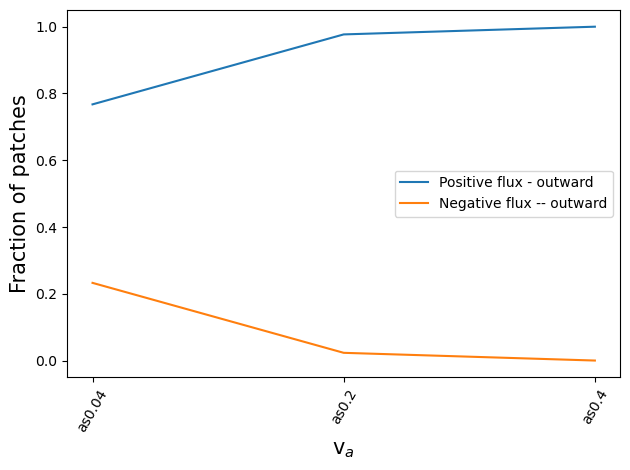

In [12]:
out_flux_pos,out_flux_neg = create_net_flux_out(avg_decomp_df, vastr, possible_sets,{'Decomp': "Decompaction"})

# plt.plot(vastr[1:-1],ts_flux_pos,label="Positive flux -- two-sided")
# plt.plot(vastr[1:-1],ts_flux_neg,label="Negative flux -- two-sided")
plt.plot(vastr[:-1], out_flux_pos, label="Positive flux - outward")
plt.plot(vastr[:-1], out_flux_neg, label="Negative flux -- outward")
plt.xticks(rotation=60)
plt.xlabel("v$_a$", fontsize=15)
plt.ylabel("Fraction of patches", fontsize=15)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
print(new_df.columns)

Index(['Chrom1-id', 'Domain1', 'Domain1-points-to', 'Specific',
       'as0.04_Decomp_discretized', 'as0.2_Decomp_discretized',
       'as0.4_Decomp_discretized', 'as0.7_Decomp_discretized'],
      dtype='object')
